[[    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.  1062.   -81.     0.     0.     0.     0.     0.     0.     0.]
 [    0.  -981.  1062.   -81.     0.     0.     0.     0.     0.     0.]
 [    0.     0.  -981.  1062.   -81.     0.     0.     0.     0.     0.]
 [    0.     0.     0.  -981.  1062.   -81.     0.     0.     0.     0.]
 [    0.     0.     0.     0.  -981.  1062.   -81.     0.     0.     0.]
 [    0.     0.     0.     0.     0.  -981.  1062.   -81.     0.     0.]
 [    0.     0.     0.     0.     0.     0.  -981.  1062.   -81.     0.]
 [    0.     0.     0.     0.     0.     0.     0.  -981.  1062.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]]


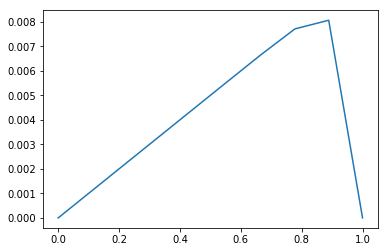

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def conv_cent(A,grid,conv=100):
    for i in range(1,grid.size-1):
        h=grid[i+1]-grid[i-1]
        if i==1:
            A[i,i+1]+=conv/h
        elif i==grid.size-2:
            A[i,i-1]+=-conv/h
        else:
            A[i,i+1]+=conv/h
            A[i,i-1]+=-conv/h
    return A

def conv_upwind(A,grid,conv=100):
    for i in range(1,grid.size-1):
        if conv>0:
            h=grid[i]-grid[i-1]
            A[i,i]+=conv/h
            if i>1:
                A[i,i-1]+=-conv/h
        else:
            h=grid[i+1]-grid[i]
            A[i,i]-=conv/h
            if i<grid.size-2:
                A[i,i+1]+=conv/h
    return A
                

def diff_cent(A,grid,diff=1):
    for i in range(1,grid.size-1):
        hr=grid[i+1]-grid[i]
        hl=grid[i]-grid[i-1]
        denom=1/(hl*hr*(hl+hr))
        if i==1:
            A[i,i+1]-=2*hl*diff*denom
        elif i==grid.size-2:
            A[i,i-1]-=2*hr*diff*denom
        else:
            A[i,i+1]-=2*hl*diff*denom
            A[i,i-1]-=2*hr*diff*denom
        A[i,i]+=2*(hl+hr*diff)*denom
    return A



grid=np.linspace(0,1,10)
A=np.zeros((grid.size,grid.size))
A=diff_cent(A,grid)
A=conv_upwind(A,grid)
print(A)
u=np.zeros(grid.size)
b=np.ones(grid.size)
u[1:-1]=np.linalg.solve(A[1:-1,1:-1],b[1:-1])
plt.plot(grid,u)
plt.show()

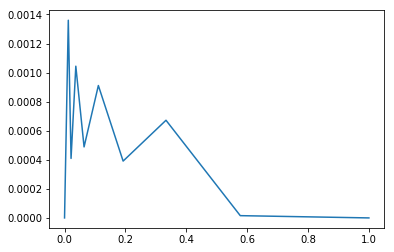

[ 0.          0.01234568  0.02138334  0.03703704  0.06415003  0.11111111
  0.19245009  0.33333333  0.57735027  1.        ]


In [38]:
n=9
grid=np.geomspace(1/n**2,1,n)
grid=np.hstack((0,grid))
A=np.zeros((grid.size,grid.size))
A=diff_cent(A,grid)
A=conv_cent(A,grid,-1000)
#print(A)
u=np.zeros(grid.size)
b=np.ones(grid.size)
u[1:-1]=np.linalg.solve(A[1:-1,1:-1],b[1:-1])
plt.plot(grid,u)
plt.show()
print(grid)